In [1]:
import os
import sys

sys.path.append(os.path.abspath('../src'))

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import torch
import numpy as np
from copolymer_simulator import Simulator
from utils import get_true_mask, plot_F1
from bax import BAX

In [4]:
N = 21
init_D_size = 10
lb = -np.inf
ub = 1.6

task_kwargs = {
    "lb": lb,
    "ub": ub,
}

In [5]:
simulator = Simulator(polymer='diblock')

In [6]:
X1_range = np.linspace(15, 53, 20)
X2_range = np.linspace(0, 100, 51)

X1, X2 = np.meshgrid(X1_range, X2_range)
X1_flat = X1.flatten()
X2_flat = X2.flatten()
grid_points = np.column_stack((X1_flat, X2_flat))  # Shape (1020, 2)
X = torch.from_numpy(grid_points)

In [7]:
mean = torch.tensor(simulator.data_table.sort_values(by=['x2', 'x1'])['rg_mean']).reshape(-1, 1)
noise = torch.tensor(simulator.data_table.sort_values(by=['x2', 'x1'])['rg_std']).reshape(-1, 1)
noise = noise.pow(2)

In [8]:
true_mask = get_true_mask(X1_range, X2_range, mean, noise, lb, ub)

In [9]:
init_X, init_Y, init_noise = simulator.get_init_data(init_D_size, random_state=1)

In [10]:
psbax = BAX(init_X, init_Y, init_noise, true_mask=true_mask)

Iteration 0/20
Empty set! Using max variance.


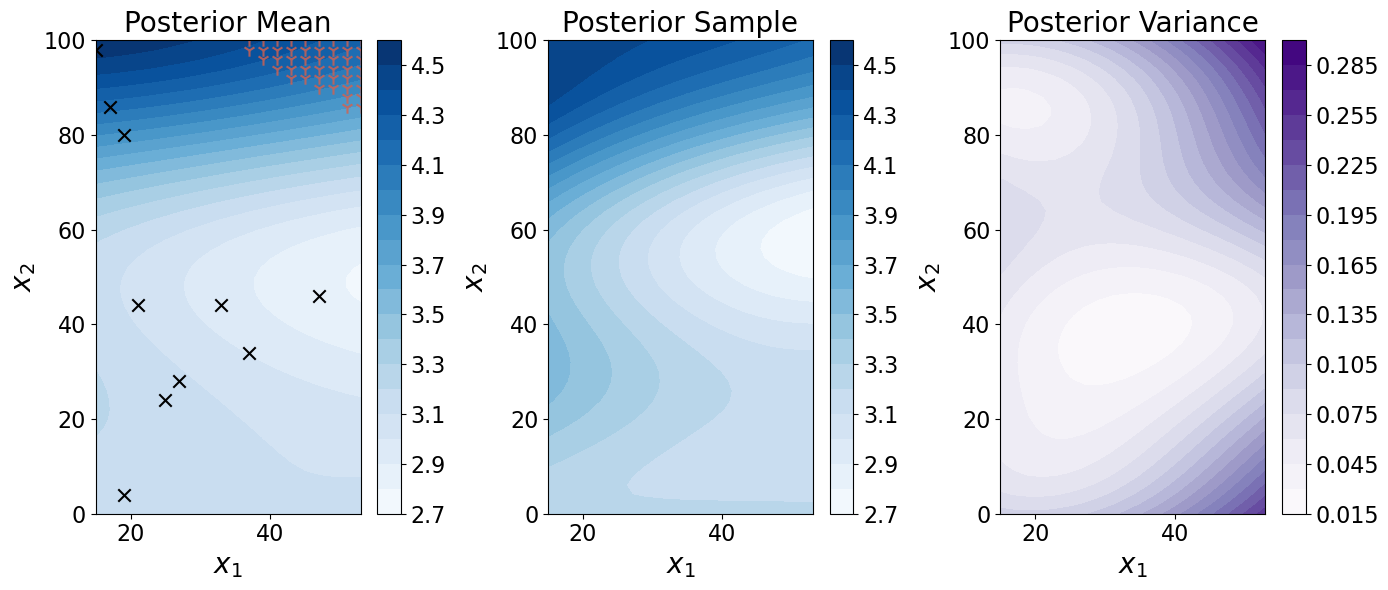

F1 Score: 0.0000
Iteration 1/20


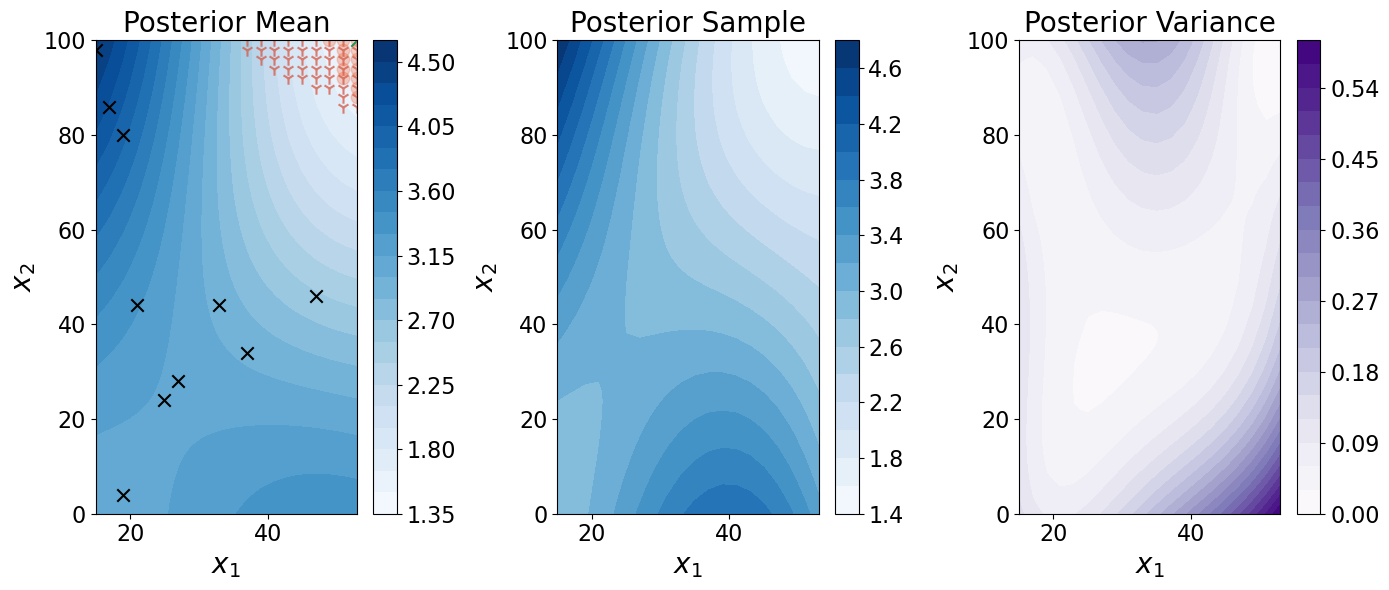

F1 Score: 0.4333
Iteration 2/20


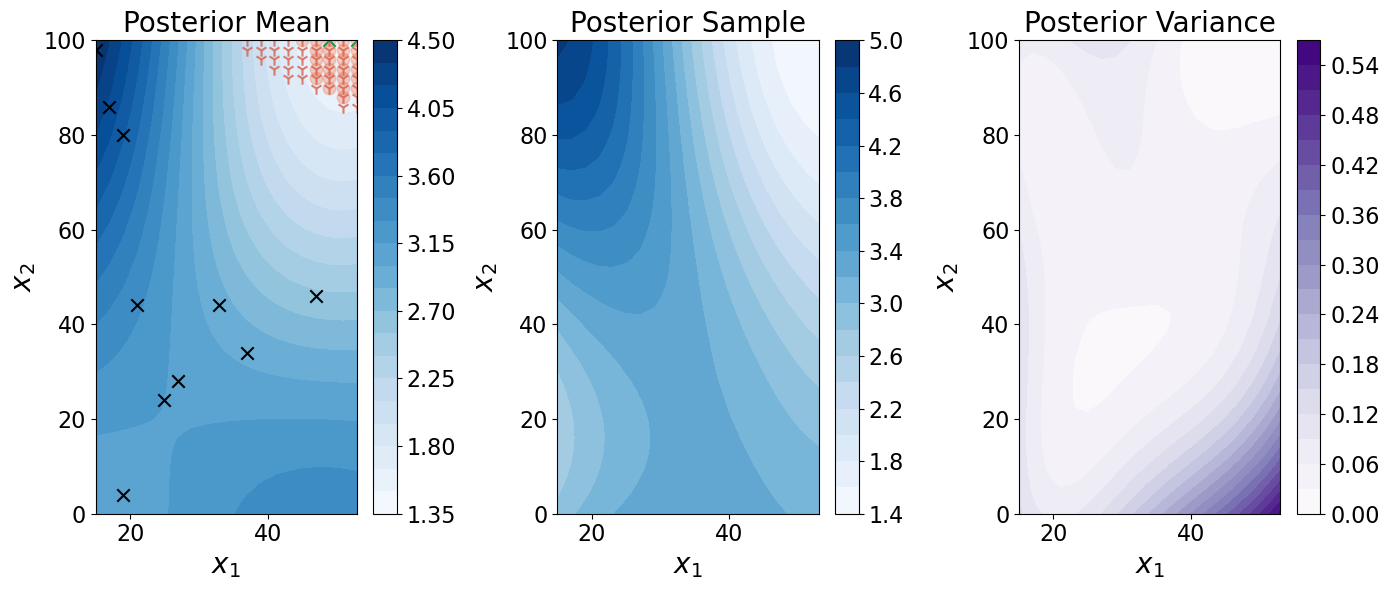

F1 Score: 0.6944
Iteration 3/20


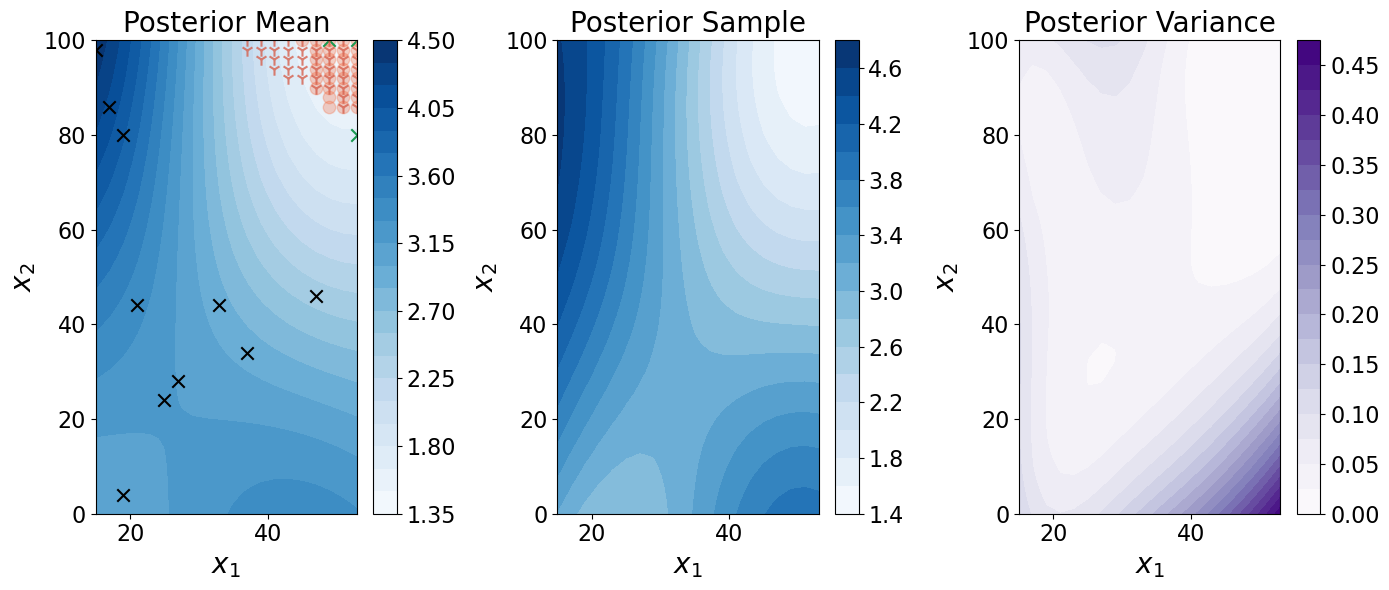

F1 Score: 0.7436
Iteration 4/20


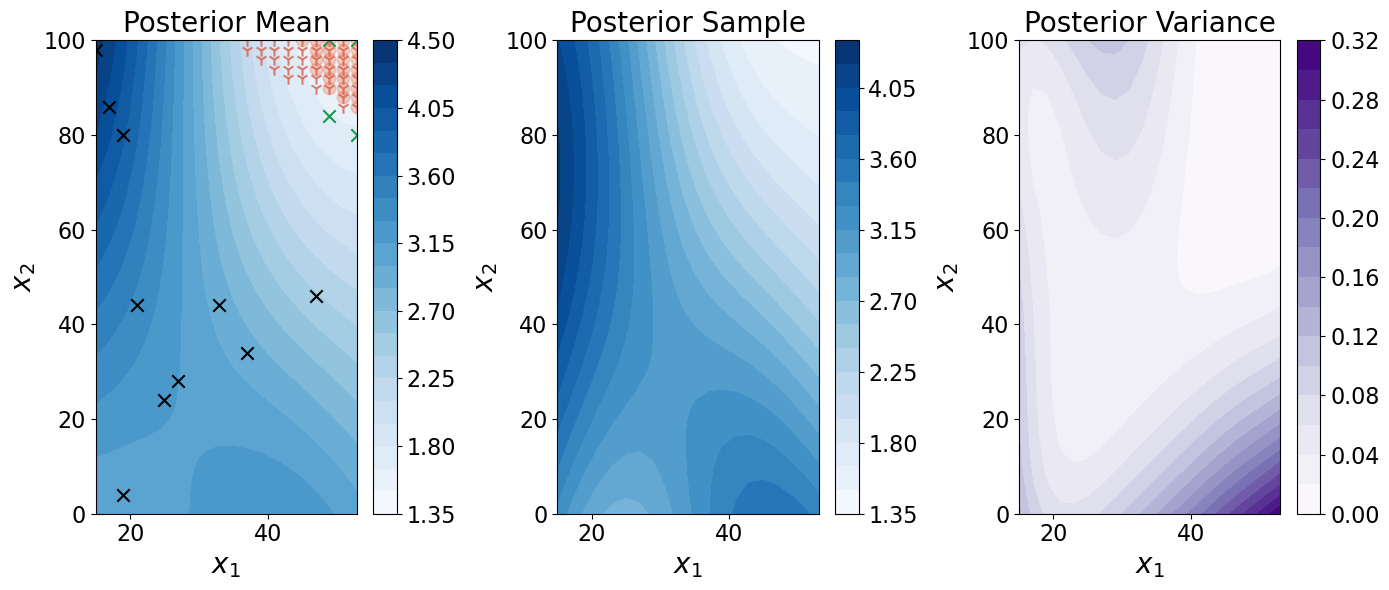

F1 Score: 0.7123
Iteration 5/20


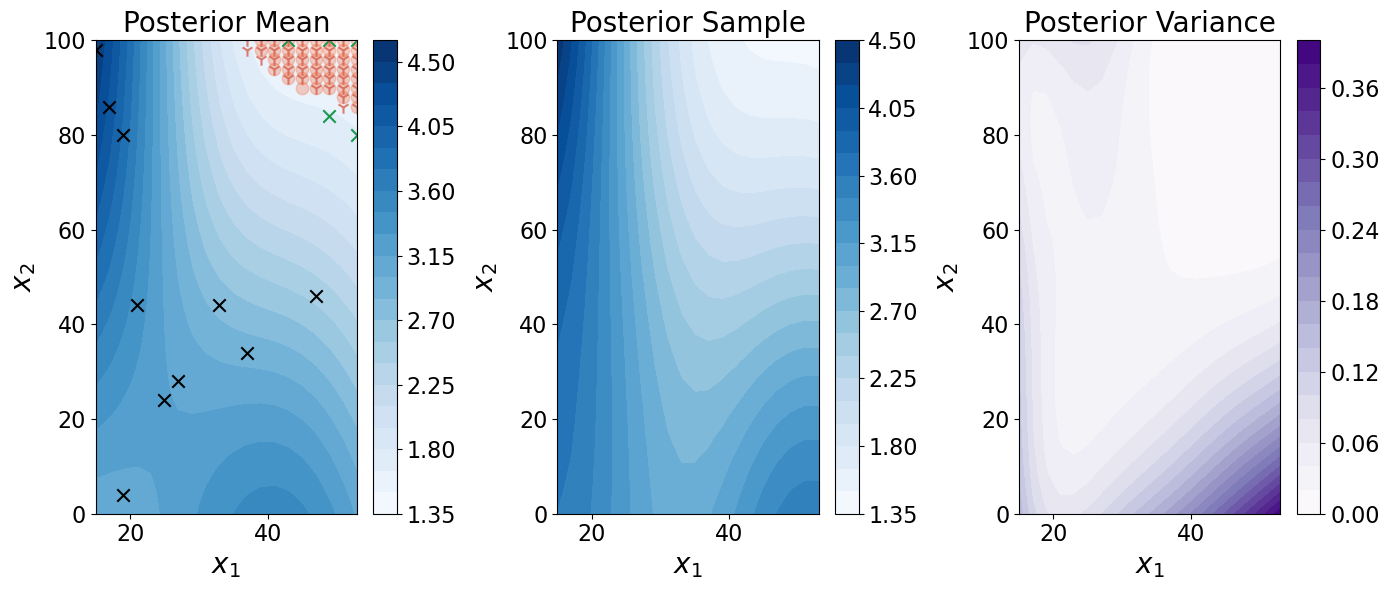

F1 Score: 0.9451
Iteration 6/20


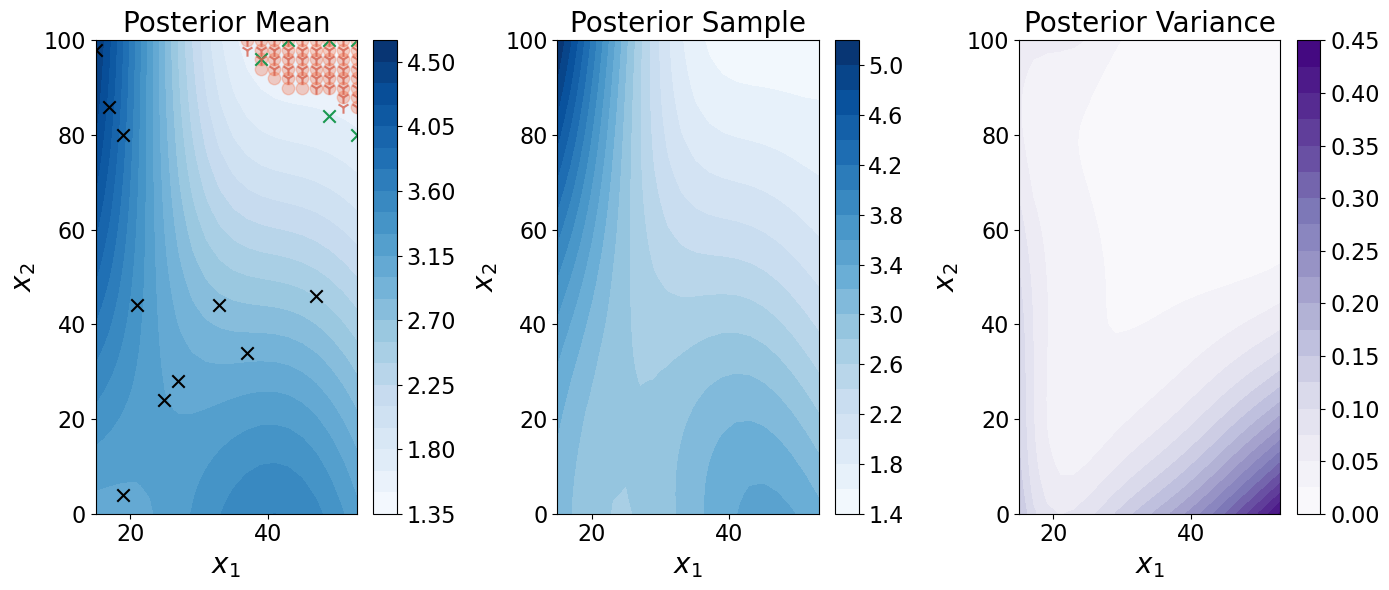

F1 Score: 0.9375
Iteration 7/20


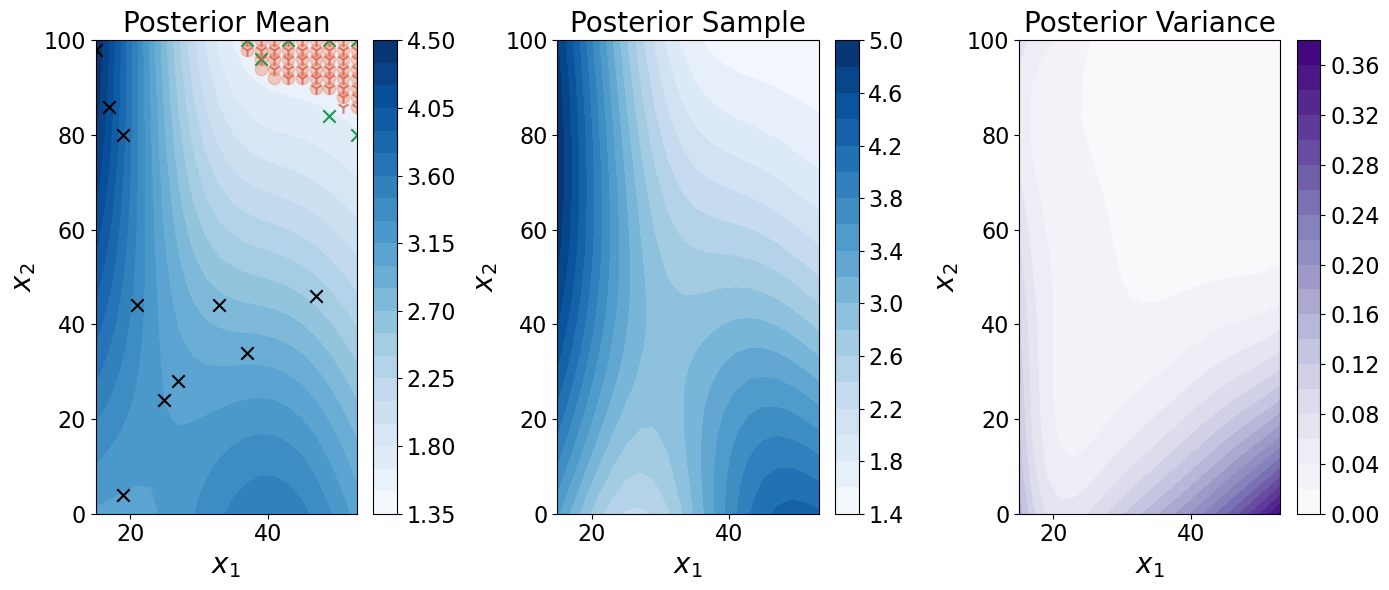

F1 Score: 0.9684
Iteration 8/20


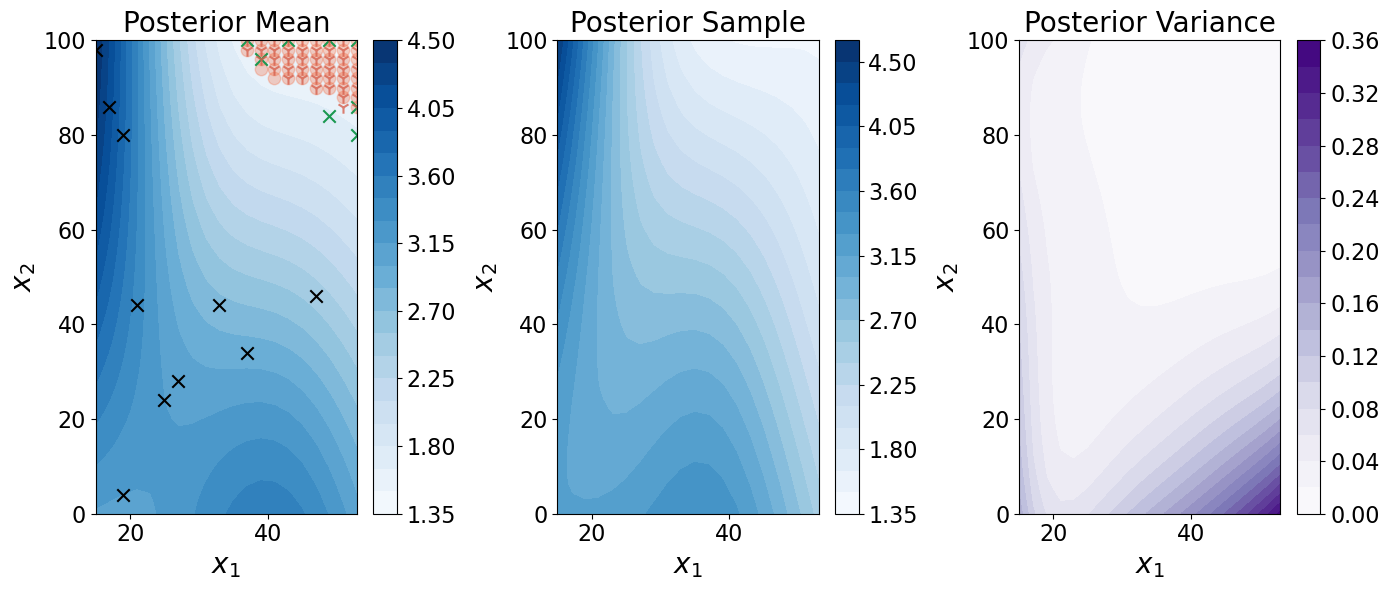

F1 Score: 0.9684
Iteration 9/20


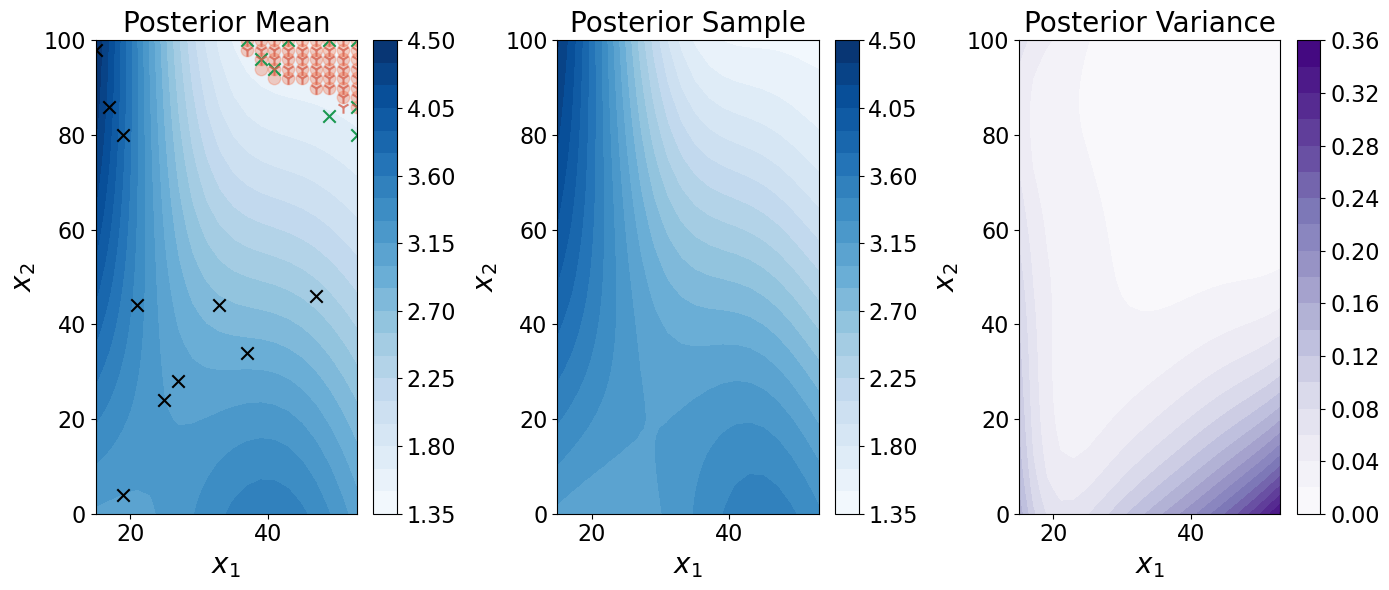

F1 Score: 0.9684
Iteration 10/20


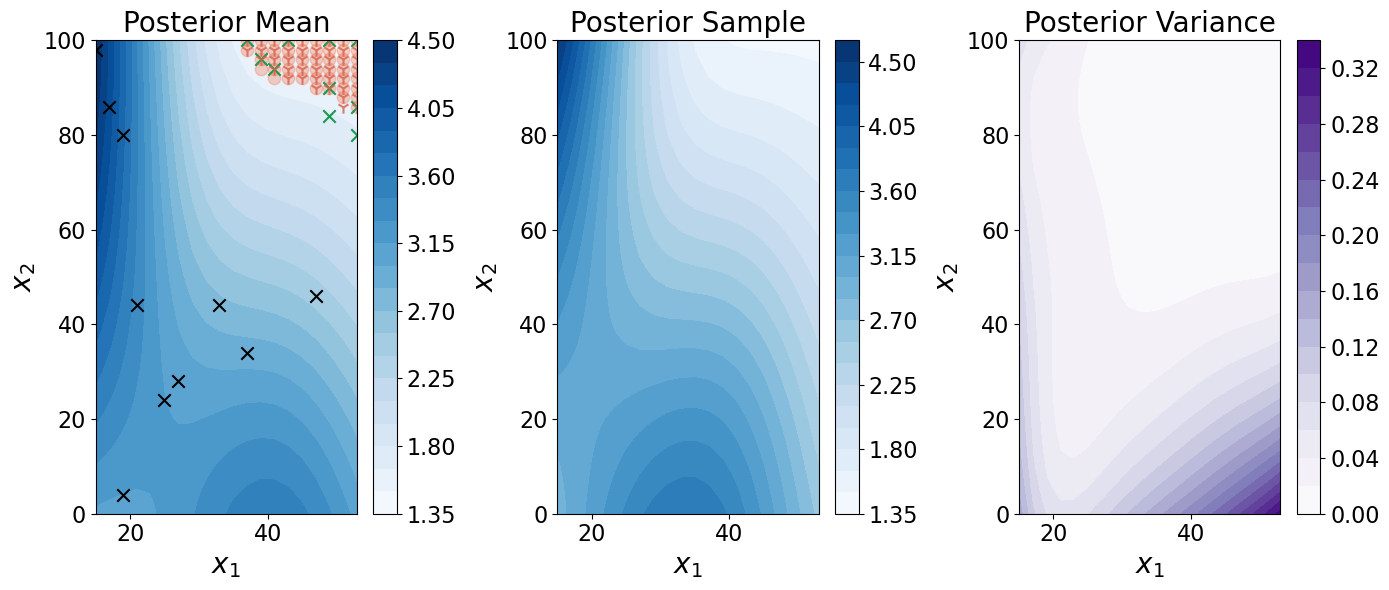

F1 Score: 0.9684
Iteration 11/20


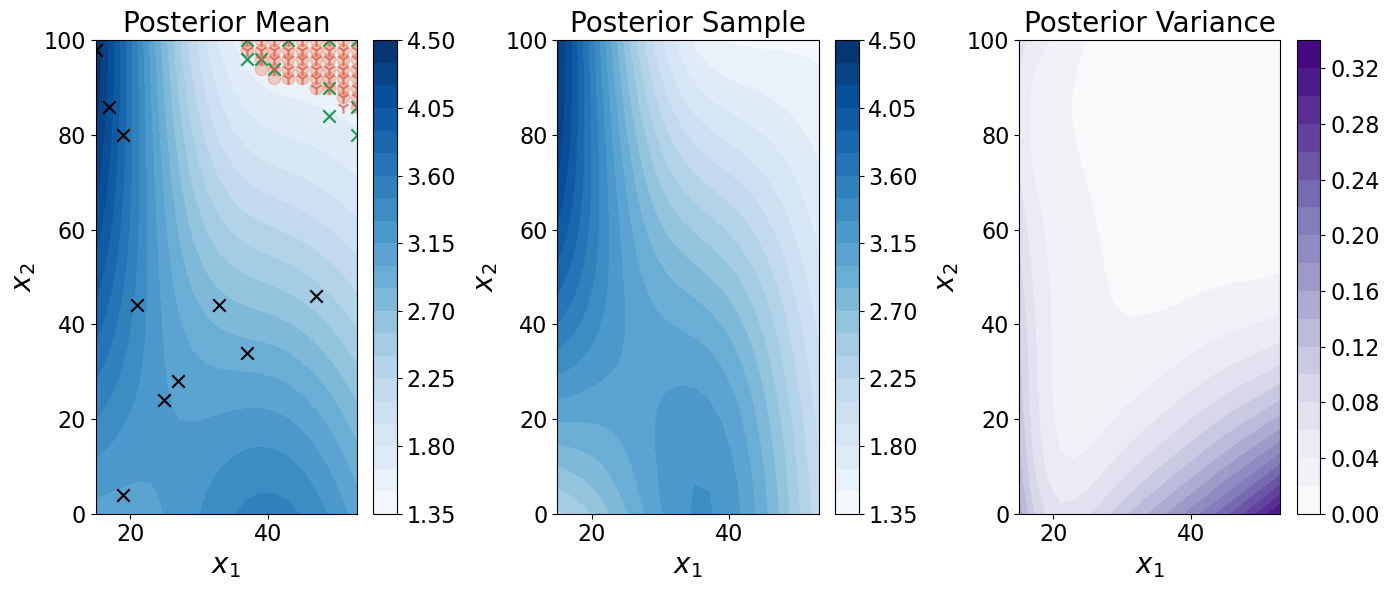

F1 Score: 0.9684
Iteration 12/20


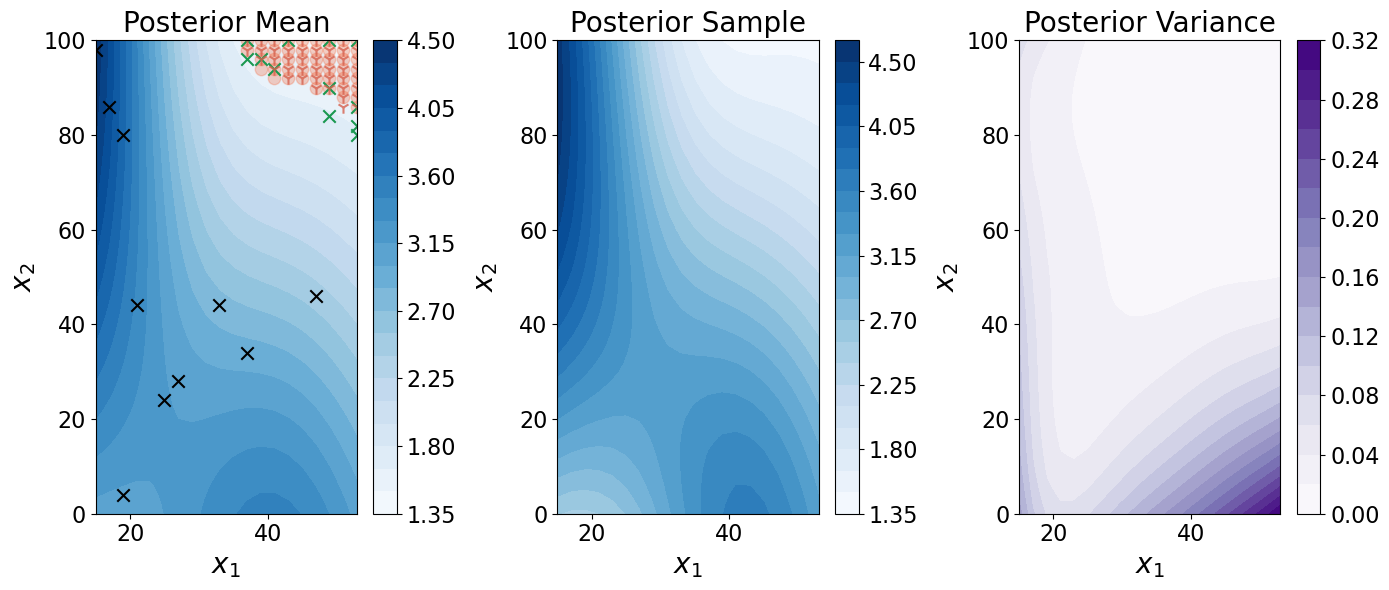

F1 Score: 0.9684
Iteration 13/20


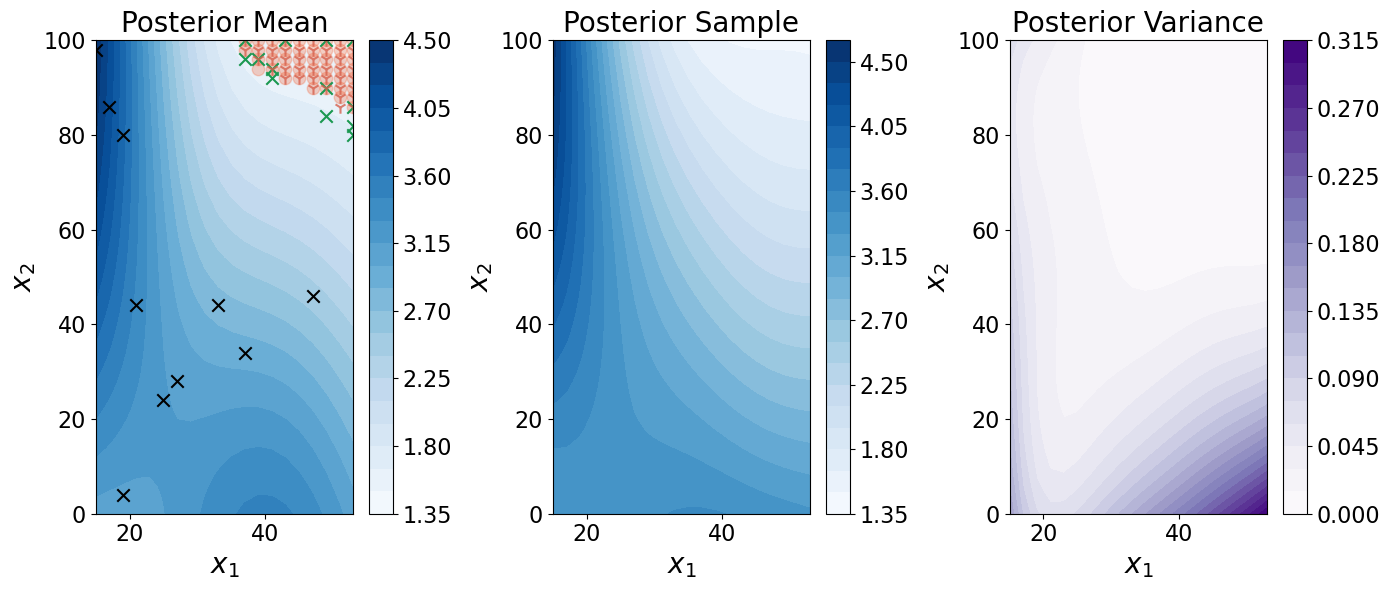

F1 Score: 0.9787
Iteration 14/20


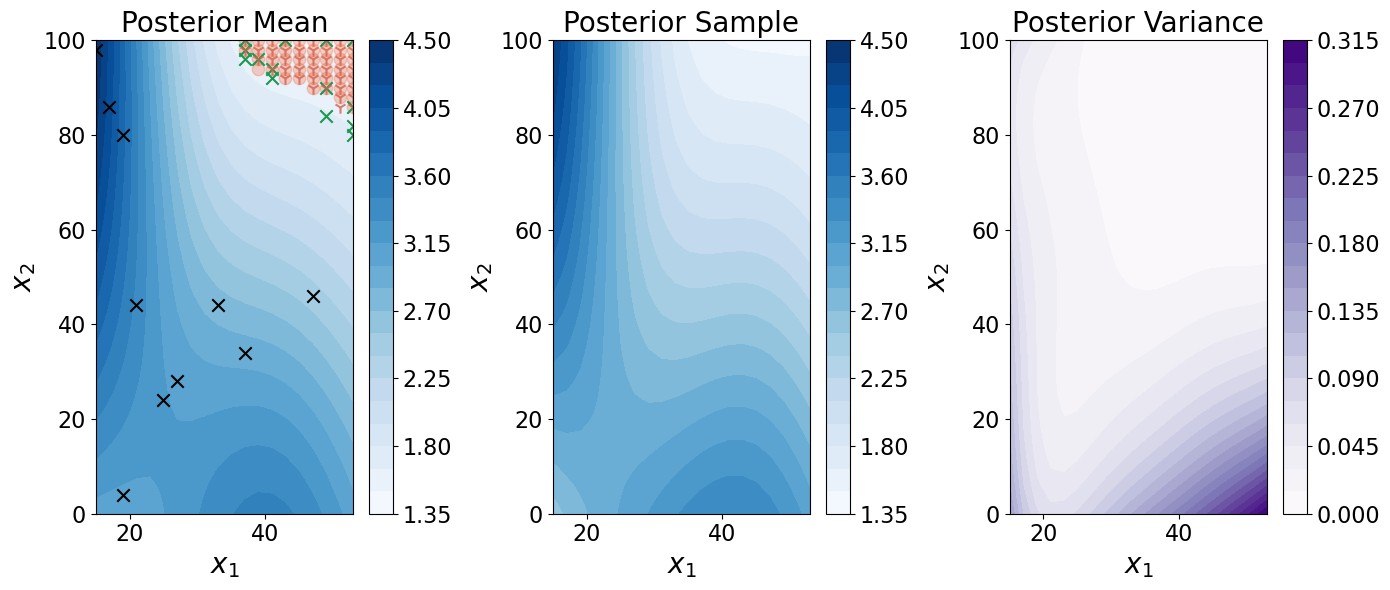

F1 Score: 0.9787
Iteration 15/20


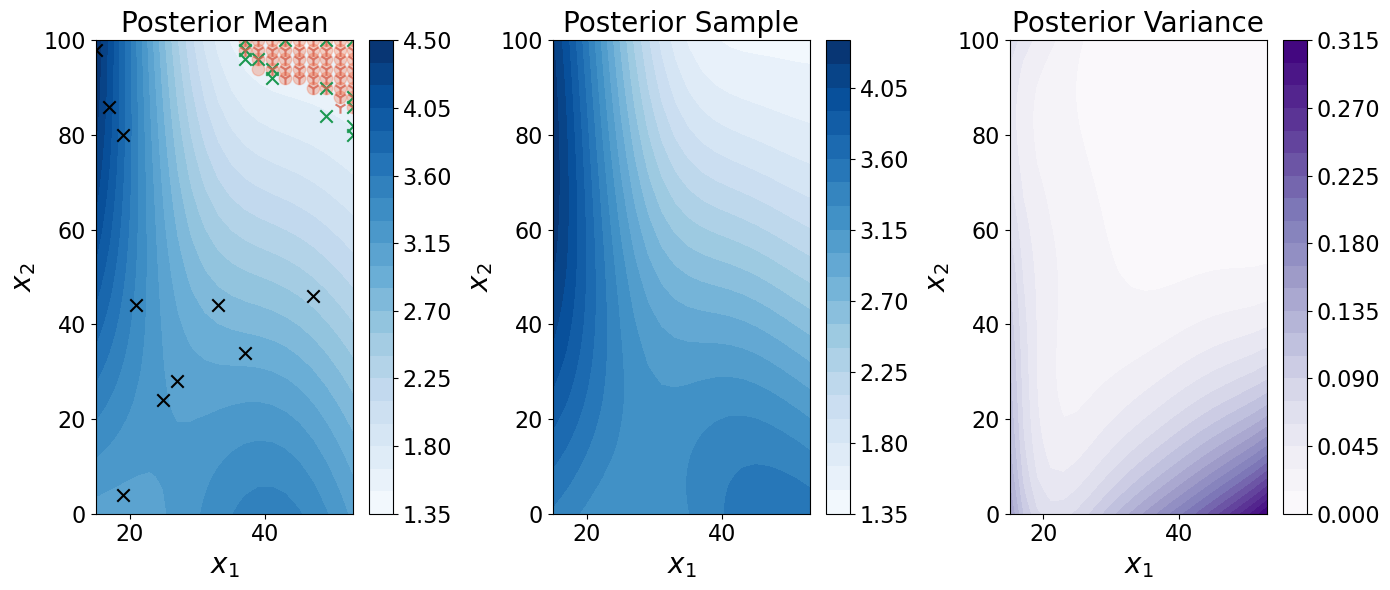

F1 Score: 0.9787
Iteration 16/20


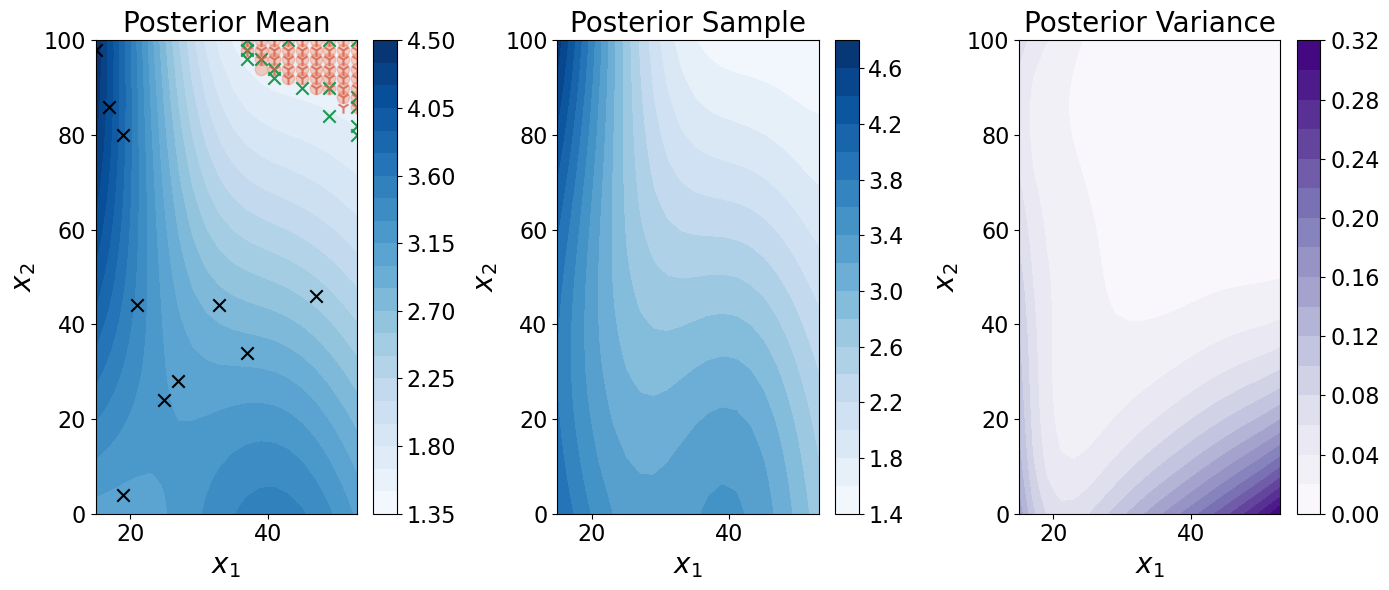

F1 Score: 0.9787
Iteration 17/20


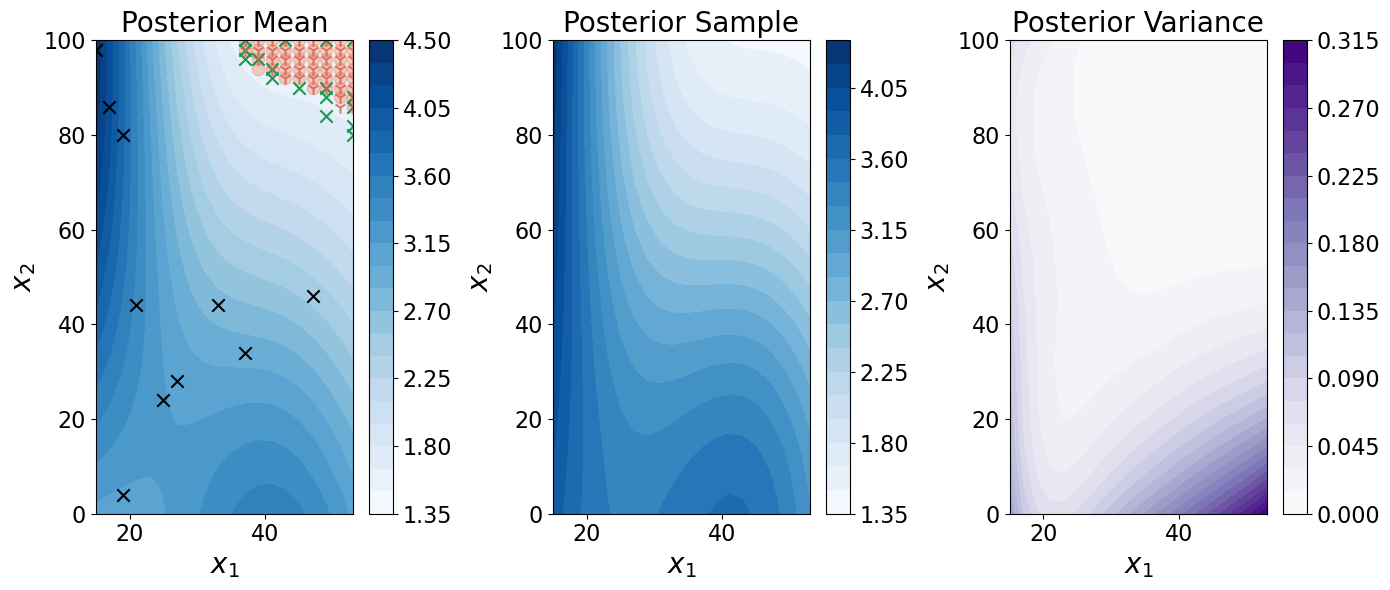

F1 Score: 0.9787
Iteration 18/20


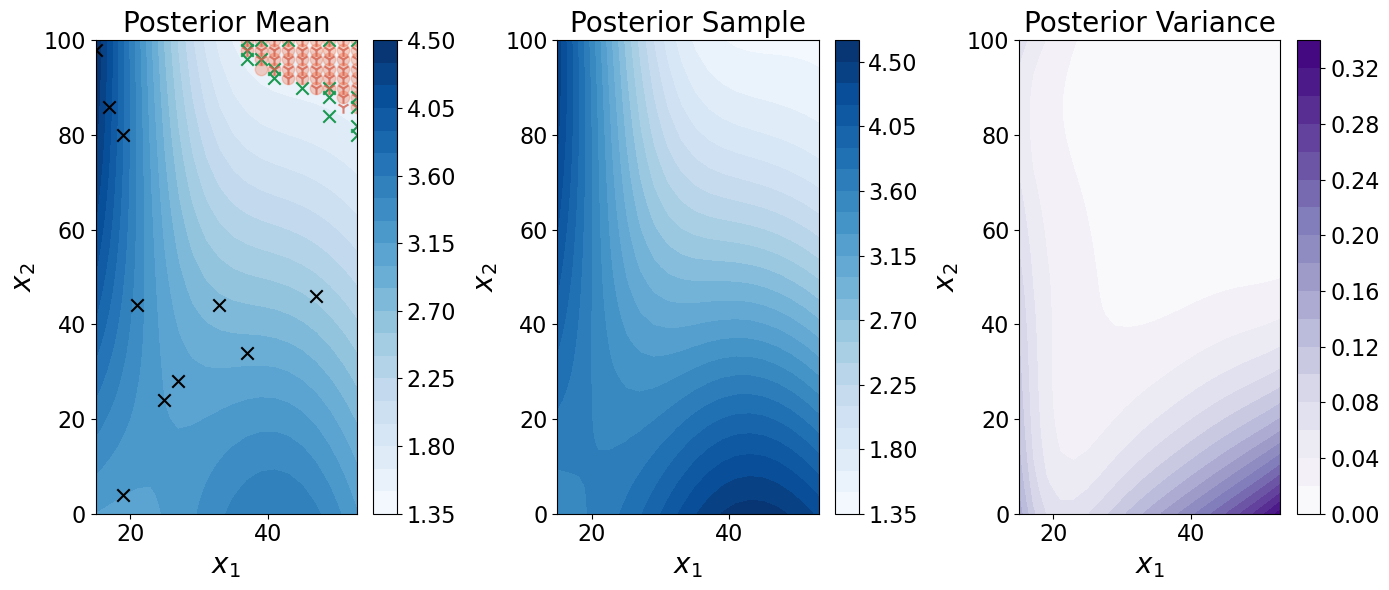

F1 Score: 0.9787
Iteration 19/20


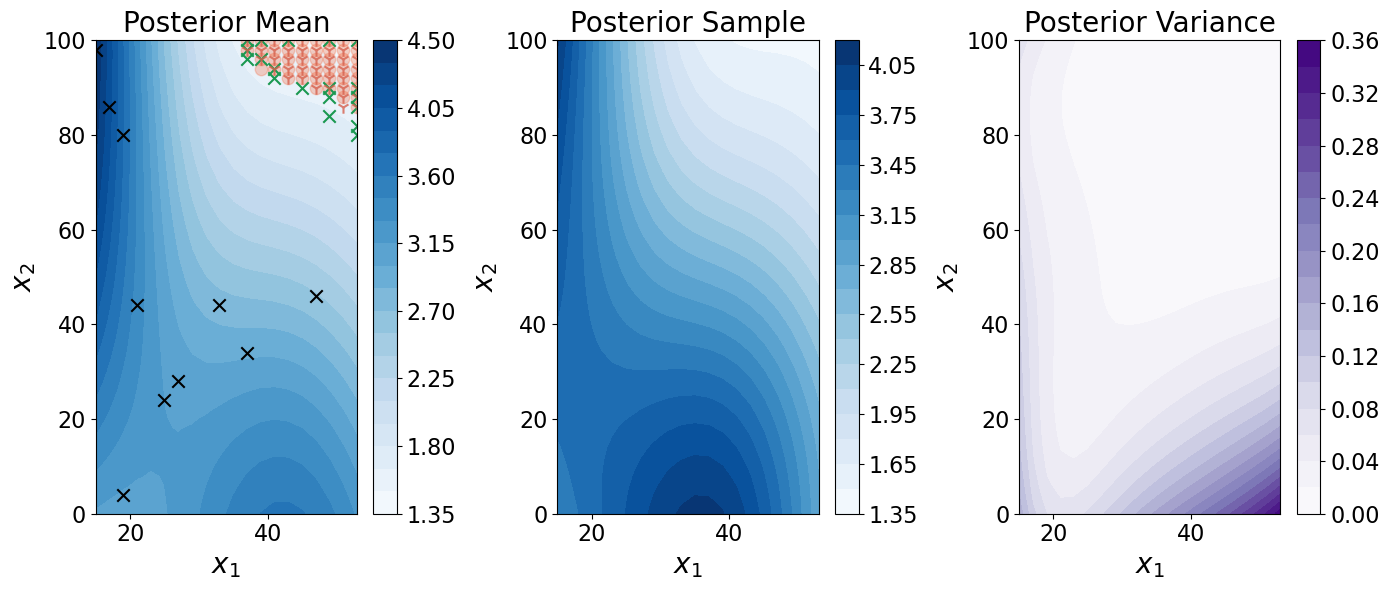

F1 Score: 0.9787
Iteration 20/20


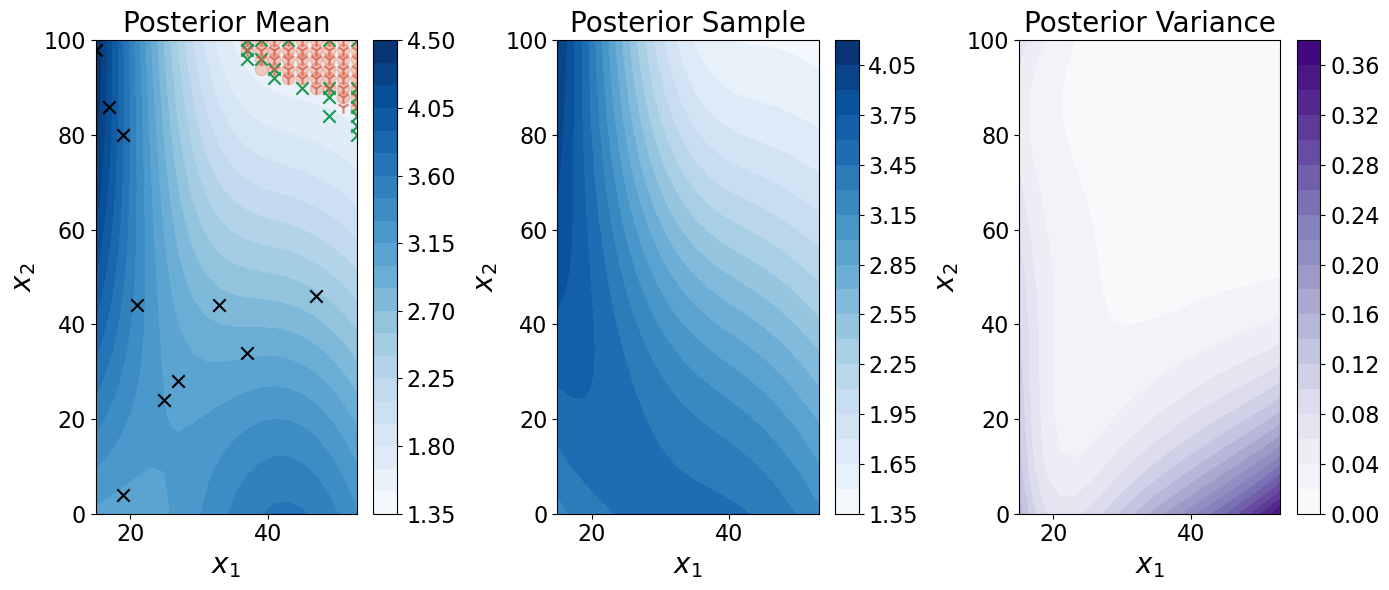

F1 Score: 0.9787


In [11]:
F1_list, samples = psbax.run(N, X1_range, X2_range, simulator, task="level set", task_kwargs=task_kwargs)

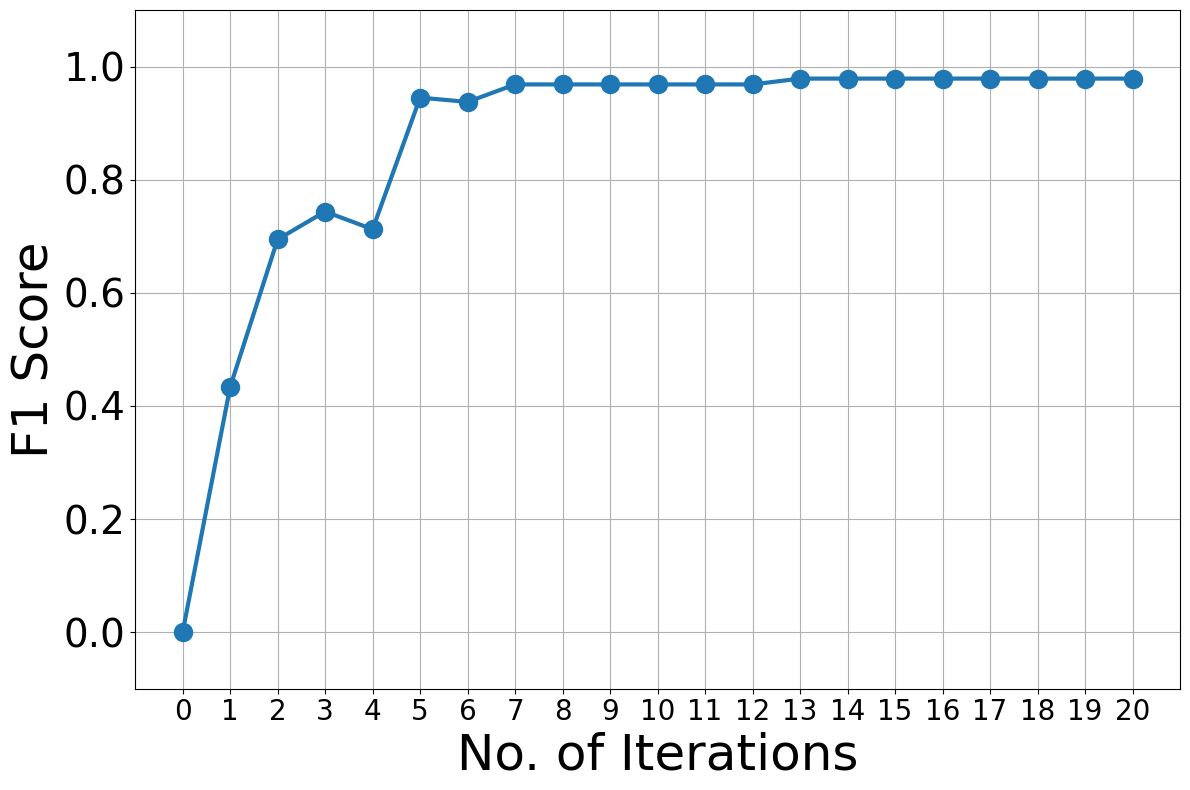

In [12]:
plot_F1(F1_list)